In [1]:
import tensorflow as tf
import numpy as np
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Dropout, BatchNormalization, MaxPooling2D
from keras.models import Sequential,load_model
import keras

In [2]:
import os

# Print the current working directory
print("Current working directory:", os.getcwd())

# Check if the file exists
file_path = '../datasets/emnist-letters-train.csv'
if os.path.isfile(file_path):
    print(f"The file {file_path} exists.")
else:
    print(f"The file {file_path} does not exist.")

Current working directory: c:\Users\ayseg\OneDrive\Masaüstü\bitirme_kod\train
The file ../datasets/emnist-letters-train.csv exists.


In [3]:
train_images = pd.read_csv("../datasets/emnist-letters-train.csv",header=None)
test_images = pd.read_csv("../datasets/emnist-letters-test.csv",header=None)
map_images = pd.read_csv("../datasets/emnist-letters-mapping.txt",header=None) 


In [4]:
# Seperating labels from features in training and test data.
train_x = train_images.iloc[:,1:]  
train_y = train_images.iloc[:,0]  
train_x = train_x.values

test_x = test_images.iloc[:,1:]
test_y = test_images.iloc[:,0]
test_x = test_x.values


ascii_map = []
for i in map_images.values:
    ascii_map.append(i[0].split()[1])

# plt.imshow(np.rot90(np.fliplr(train_x[1].reshape(28,28))))

def rot_flip(image):
    image = image.reshape([28, 28])
    image = np.fliplr(image)
    image = np.rot90(image)
    return image

train_x = np.apply_along_axis(rot_flip,1,train_x)
test_x = np.apply_along_axis(rot_flip,1,test_x)
# plt.imshow(train_x[2])
# train_x.shape

train_x = train_x.astype('float32')
train_x = train_x/255.0

test_x = test_x.astype('float32')
test_x = test_x/255.0

train_x = train_x.reshape(-1, 28,28, 1)   #Equivalent to (112800,28,28,1)
test_x = test_x.reshape(-1, 28,28, 1)   #Equivalent to (18800,28,28,1)

In [5]:
# CNN modeli oluşturma (BİZİM MODEL)
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(28, activation='softmax'))


C:\Users\ayseg\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [6]:
model.compile(optimizer = 'adam',loss= "sparse_categorical_crossentropy", metrics=['accuracy'])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 24, 24, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 12, 12, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 10, 10, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 3, 3, 128)      │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 1, 1, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │        66,048 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 28)             │         3,612 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 474,140 (1.81 MB)

 Trainable params: 474,140 (1.81 MB)

 Non-trainable params: 0 (0.00 B)

In [7]:
from keras.callbacks import EarlyStopping
early_stopper = EarlyStopping(monitor='val_loss', patience=3, verbose=1, restore_best_weights=True)

history = model.fit(
    train_x,
    train_y,
    validation_data = (test_x,test_y),
    epochs = 10, callbacks=[early_stopper]
)

Epoch 1/10
2775/2775 ━━━━━━━━━━━━━━━━━━━━ 68s 24ms/step - accuracy: 0.4416 - loss: 1.8178 - val_accuracy: 0.8738 - val_loss: 0.3798
Epoch 2/10
2775/2775 ━━━━━━━━━━━━━━━━━━━━ 62s 22ms/step - accuracy: 0.8773 - loss: 0.4246 - val_accuracy: 0.8952 - val_loss: 0.3269
Epoch 3/10
2775/2775 ━━━━━━━━━━━━━━━━━━━━ 61s 22ms/step - accuracy: 0.9018 - loss: 0.3349 - val_accuracy: 0.9018 - val_loss: 0.3175
Epoch 4/10
2775/2775 ━━━━━━━━━━━━━━━━━━━━ 62s 22ms/step - accuracy: 0.9163 - loss: 0.2896 - val_accuracy: 0.9116 - val_loss: 0.2833
Epoch 5/10
2775/2775 ━━━━━━━━━━━━━━━━━━━━ 60s 22ms/step - accuracy: 0.9213 - loss: 0.2739 - val_accuracy: 0.9035 - val_loss: 0.3053
Epoch 6/10
2775/2775 ━━━━━━━━━━━━━━━━━━━━ 60s 22ms/step - accuracy: 0.9261 - loss: 0.2464 - val_accuracy: 0.9133 - val_loss: 0.2966
Epoch 7/10
2775/2775 ━━━━━━━━━━━━━━━━━━━━ 61s 22ms/step - accuracy: 0.9295 - loss: 0.2328 - val_accuracy: 0.9084 - val_loss: 0.3041
Epoch 7: early stopping
Restoring model weights from the end of the best epo

In [8]:
model.save("../models/letters_model2.h5")

ascii_map = []
for i in map_images.values:
    ascii_map.append(i[0].split()[1])

In [9]:
# Adding character to associated ASCII Value
character = []
for i in ascii_map:
    character.append(chr(int(i)-1)) # int(i)-1  : -1 eklendi çünkü tahmin işleminde etiketlerde kayma vardı, gerçek etiket:A tahmin edilen:B oluyordu.

# plt.imshow(np.rot90(np.fliplr(train_x[1].reshape(28,28))))
character = pd.DataFrame(character)


ascii_map = pd.DataFrame(ascii_map)
ascii_map["Character"] = character
ascii_map.to_csv("../mapping/last-emnist-letters-mapping.csv",index=False,header=True)

In [10]:
gg

NameError: name 'gg' is not defined

In [ ]:
print(ascii_map)


      0 Character
0    65         @
1    66         A
2    67         B
3    68         C
4    69         D
5    70         E
6    71         F
7    72         G
8    73         H
9    74         I
10   75         J
11   76         K
12   77         L
13   78         M
14   79         N
15   80         O
16   81         P
17   82         Q
18   83         R
19   84         S
20   85         T
21   86         U
22   87         V
23   88         W
24   89         X
25   90         Y
26   97         `
27   98         a
28   99         b
29  100         c
30  101         d
31  102         e
32  103         f
33  104         g
34  105         h
35  106         i
36  107         j
37  108         k
38  109         l
39  110         m
40  111         n
41  112         o
42  113         p
43  114         q
44  115         r
45  116         s
46  117         t
47  118         u
48  119         v
49  120         w
50  121         x
51  122         y


In [11]:
# Model ile tahmin yapın
y_pred = model.predict(test_x)
y_pred_classes = np.argmax(y_pred, axis=1)
# Eğer y_test zaten etiketleri içeriyorsa (one-hot encoded değilse)
y_true = test_y

463/463 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step


In [12]:

# Metrikleri hesaplayın
accuracy = accuracy_score(y_true, y_pred_classes)
precision = precision_score(y_true, y_pred_classes, average='weighted')
recall = recall_score(y_true, y_pred_classes, average='weighted')
f1 = f1_score(y_true, y_pred_classes, average='weighted')

# Sonuçları yazdırın
print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')

# Detaylı sınıflandırma raporu
# print(classification_report(y_true, y_pred_classes))

Accuracy: 0.9116216216216216
Precision: 0.921003348245827
Recall: 0.9116216216216216
F1 Score: 0.9151027361720079


C:\Users\ayseg\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


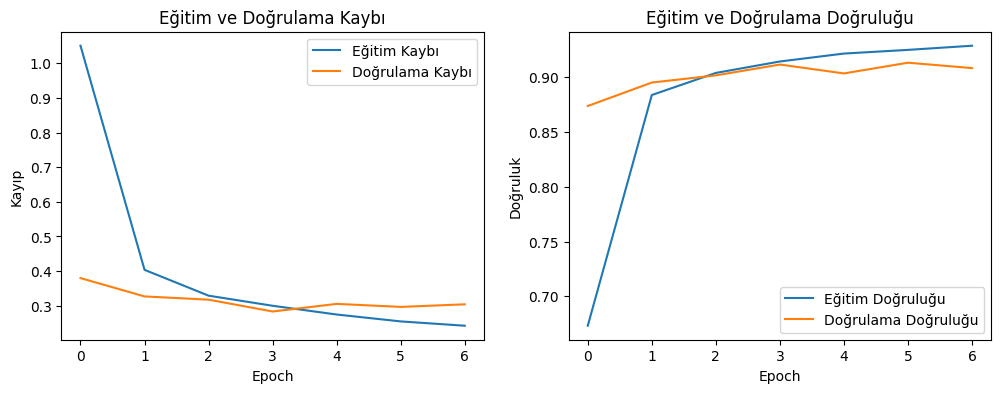

In [13]:
# history nesnesini eğitirken kaydedin
# history = model.fit(...)

# Kayıp ve doğruluk grafiklerini çizmek için
def plot_history(history):
    # Kayıp
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Eğitim Kaybı')
    plt.plot(history.history['val_loss'], label='Doğrulama Kaybı')
    plt.xlabel('Epoch')
    plt.ylabel('Kayıp')
    plt.legend()
    plt.title('Eğitim ve Doğrulama Kaybı')

    # Doğruluk
    plt.subplot(1, 2, 2)
    plt.plot(history.history['accuracy'], label='Eğitim Doğruluğu')
    plt.plot(history.history['val_accuracy'], label='Doğrulama Doğruluğu')
    plt.xlabel('Epoch')
    plt.ylabel('Doğruluk')
    plt.legend()
    plt.title('Eğitim ve Doğrulama Doğruluğu')
    
    plt.show()

# history nesnesini kullanarak grafik çizme
plot_history(history)


In [21]:
# Önceden eğitilmiş modeli yükle
model = tf.keras.models.load_model('../models/52-letters_model.h5')  

In [22]:
# Başka bir kod dosyasında CSV dosyasını okuma
ascii_map = pd.read_csv('../mapping/emnist-letters-mapping-son.csv')

TypeError: Can't convert object to 'str' for 'filename'

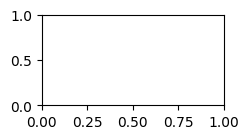

In [27]:
import numpy as np
import matplotlib.pyplot as plt
from keras.preprocessing import image as keras_image
from keras.preprocessing import image
import cv2
# Dışarıdan alınacak resimlerin yollarını belirtin
image_paths = [
    "../test_data/B.png",
    "../test_data/C.png",
    "../test_data/E.png",
    "../test_data/F.png",
    "../test_data/I.png",
    "../test_data/K.png",
    "../test_data/kucuk_a.png",
    "../test_data/kucuk_e.png",
    "../test_data/kucuk_y.png",
]

def predict_image(image_path):
    img = image.load_img(image_path, target_size=(28, 28))
    x = image.img_to_array(img)
    x = x / 255.0

    gray_image = cv2.cvtColor(x, cv2.COLOR_BGR2GRAY)
    gray_image = np.expand_dims(gray_image, axis=-1)
    gray_image = np.expand_dims(gray_image, axis=0)
    cl = model.predict(gray_image)
    cl = list(cl[0])

    return ascii_map["Character"][cl.index(max(cl))]

# Resimleri gösterme ve tahmin yapma
plt.figure(figsize=(8, 4))
for i, path in enumerate(image_paths, 1):
    plt.subplot(3, 3, i)
    
    img = cv2.imread(image_paths)
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title(f"Prediction: {predict_image(image_paths)}")
    plt.axis('off')
    
    
    # Modelde tahmin yapma

    predicted_label = np.argmax(model.predict_image(image_paths))
    plt.title(f"Predicted: {predicted_label[0]}")
    
plt.tight_layout()
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


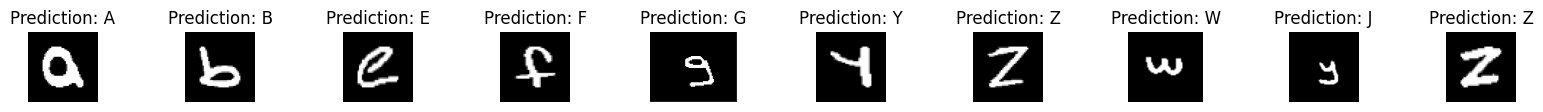

In [25]:
from keras.preprocessing import image
import cv2
import matplotlib.pyplot as plt
import numpy as np

# Örnek bir model ve ascii_map varsayılan olarak tanımlanmış gibi kabul edilecektir.
# Modelin ve ascii_map'in gerçek değerleri kodunuzda tanımlanmış olmalıdır.


def predict_image(image_path):
    img = image.load_img(image_path, target_size=(28, 28))
    x = image.img_to_array(img)
    x = x / 255.0

    gray_image = cv2.cvtColor(x, cv2.COLOR_BGR2GRAY)
    gray_image = np.expand_dims(gray_image, axis=-1)
    gray_image = np.expand_dims(gray_image, axis=0)
    cl = model.predict(gray_image)
    cl = list(cl[0])

    return ascii_map["Character"][cl.index(max(cl))]

# Tahmin edilecek resimlerin listesi
image_paths = ["../test_data/kucuk_a.png", "../test_data/kucuk_b.png", "../test_data/kucuk_e.png", "../test_data/kucuk_f.png", "../test_data/kucuk_g.PNG", "../test_data/Y.png", "../test_data/Z.png", "../test_data/kucuk_w.PNG", "../test_data/kucuk_y.PNG" , "../test_data/kucuk_z.png" ]

plt.figure(figsize=(len(image_paths) * 2, 2))
for i, image_path in enumerate(image_paths):
    plt.subplot(2, len(image_paths), i + 1)
    img = cv2.imread(image_path)
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title(f"Prediction: {predict_image(image_path)}")
    plt.axis('off')

plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


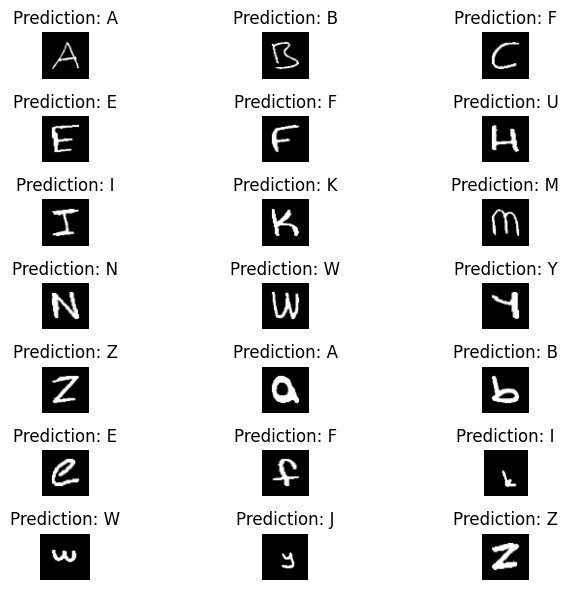

In [30]:
from keras.preprocessing import image
import cv2
import matplotlib.pyplot as plt
import numpy as np

# Örnek bir model ve ascii_map varsayılan olarak tanımlanmış gibi kabul edilecektir.
# Modelin ve ascii_map'in gerçek değerleri kodunuzda tanımlanmış olmalıdır.

def predict_image(image_path):
    img = image.load_img(image_path, target_size=(28, 28))
    x = image.img_to_array(img)
    x = x / 255.0

    gray_image = cv2.cvtColor(x, cv2.COLOR_BGR2GRAY)
    gray_image = np.expand_dims(gray_image, axis=-1)
    gray_image = np.expand_dims(gray_image, axis=0)
    cl = model.predict(gray_image)
    cl = list(cl[0])

    return ascii_map["Character"][cl.index(max(cl))]

# Tahmin edilecek resimlerin listesi
image_paths = ["../test_data/A.png", "../test_data/B.png",
                "../test_data/C.png", "../test_data/E.png", 
               "../test_data/F.png", "../test_data/H.png", 
               "../test_data/I.png", "../test_data/K.png",
               "../test_data/M.png" , "../test_data/N.png",
                "../test_data/W.png" , "../test_data/Y.png", "../test_data/Z.png", 
               "../test_data/kucuk_a.png", "../test_data/kucuk_b.PNG", 
               "../test_data/kucuk_e.PNG" , "../test_data/kucuk_f.png",
                "../test_data/kucuk_k.png", "../test_data/kucuk_w.PNG", 
               "../test_data/kucuk_y.png" , "../test_data/kucuk_z.png"]

# Resimleri gösterme ve tahmin yapma
plt.figure(figsize=(8, 6))
for i, image_path in enumerate(image_paths):
    plt.subplot(7, 3, i + 1)
    img = cv2.imread(image_path)
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title(f"Prediction: {predict_image(image_path)}")
    plt.axis('off')

plt.tight_layout()
plt.show()


In [ ]:
# Önceden eğitilmiş modeli yükle
model = tf.keras.models.load_model('../models/52-letters_model.h5')  

463/463 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step


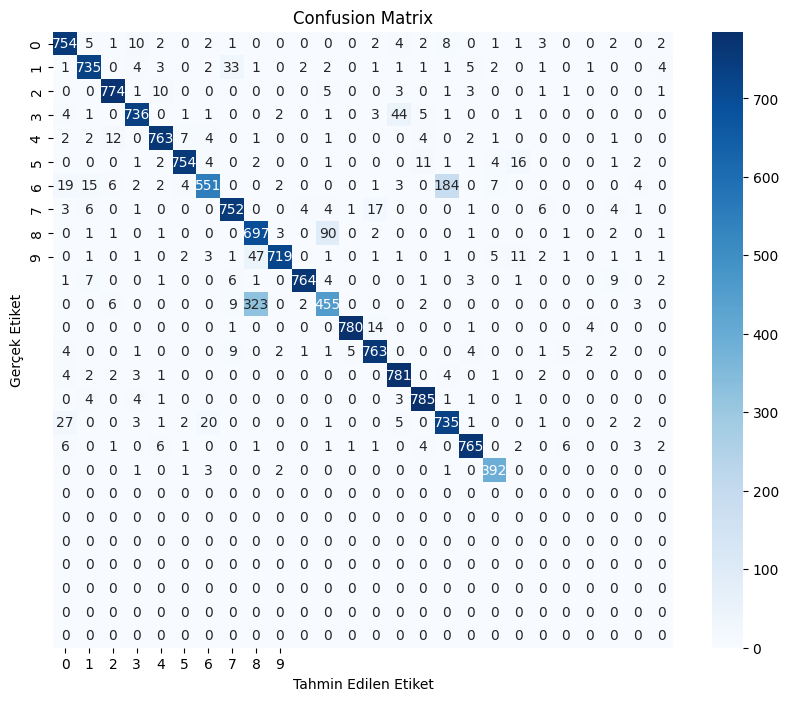

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Test verileri üzerinde tahmin yapın
y_pred = model.predict(test_x)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = test_y

# Confusion matrisini hesaplayın
conf_matrix = confusion_matrix(y_true, y_pred_classes)

# Confusion matrisini görselleştirin
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
plt.xlabel('Tahmin Edilen Etiket')
plt.ylabel('Gerçek Etiket')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
class_labels = np.unique(test_y)
print(class_labels)

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]


In [ ]:
from keras.preprocessing import image
import cv2
import matplotlib.pyplot as plt
import numpy as np

ascii_map = pd.read_csv("../mapping/emnist-letters-mapping-son.csv")

def predict_image(image_path):
    img = image.load_img(image_path, target_size=(28, 28))
    x = image.img_to_array(img)
    x = x / 255.0

    gray_image = cv2.cvtColor(x, cv2.COLOR_BGR2GRAY)
    gray_image = np.expand_dims(gray_image, axis=-1)
    gray_image = np.expand_dims(gray_image, axis=0)
    cl = model.predict(gray_image)
    cl = cl[0]

    predicted_class_index = np.argmax(cl)
    predicted_character = ascii_map.loc[predicted_class_index, "Character"]

    return predicted_character


In [ ]:
image_path = "../test_data/kucuk_a.png"
predicted_character = predict_image(image_path)
print(f"Resim için tahmin: {predicted_character}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
Resim için tahmin: A
